In [1]:
from utility import dse, parse_pickle

x = parse_pickle.parse_pickle('v0.1')
print(len(x))

(DEBUG) 2023-04-10 22:54:25,073 [logger.py:40] logger init.
(INFO) 2023-04-10 22:54:25,074 [logger.py:42] Logfile /home/chenyiqi/wafer_scale_chip_dse_framework/log/DSE4WSE_2023-04-10-22-54-25-073455.log


10


In [7]:
import numpy as np
def get_curve(histories, strategy='multi_fidelity'):
    if strategy == 'multi_fidelity':
        _sum = [None, None]
        for i in range(len(histories)):
            for j in range(2):
                tmp = np.array([k[-1] for k in histories[i][j]])
                if not isinstance(_sum[j], np.ndarray):
                    _sum[j] = tmp
                else:
                    if len(_sum[j]) > len(tmp):
                        tmp = np.pad(tmp, (0, len(_sum[j]) - len(tmp)), mode='edge')
                    else:
                        _sum[j] = np.pad(_sum[j], (0, len(tmp) - len(_sum[j])), mode='edge')
                    _sum[j] += tmp
    elif strategy == 'random' or strategy == 'single_fidelity':
        _sum = None
        for i in range(len(histories)):
            tmp = np.array([k[-1] for k in histories[i]])
            if not isinstance(_sum, np.ndarray):
                _sum = tmp
            else:
                if len(_sum) > len(tmp):
                    tmp = np.pad(tmp, (0, len(_sum) - len(tmp)), mode='edge')
                else:
                    _sum = np.pad(_sum, (0, len(tmp) - len(_sum)), mode='edge')
                _sum += tmp
    return _sum

In [2]:
import numpy as np
sum = [None, None]

for i in range(len(x)):
    for j in range(2):
        tmp = np.array([k[-1] for k in x[i][j]])
        if not isinstance(sum[j], np.ndarray):
            sum[j] = tmp
        else:
            if len(sum[j]) > len(tmp):
                tmp = np.pad(tmp, (0, len(sum[j]) - len(tmp)), mode='edge')
            else:
                sum[j] = np.pad(sum[j], (0, len(tmp) - len(sum[j])), mode='edge')
            sum[j] += tmp
    

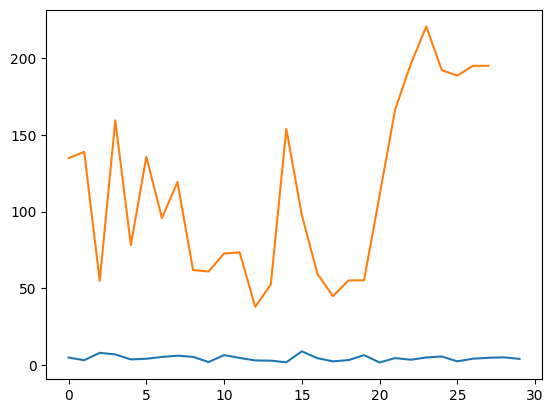

In [3]:
curve1 = -sum[0] / len(x)
curve2 = -sum[1] / len(x)

import matplotlib.pyplot as plt
plt.plot(np.arange(len(curve1)), curve1)
plt.plot(np.arange(len(curve2)), curve2)

plt.show()

In [4]:
x_ = parse_pickle.parse_pickle('random_v0.1', strategy='random')
print(len(x_))

10


In [6]:
print(len(x_[0]))

50


In [8]:
random_sum = get_curve(x_, strategy='random')

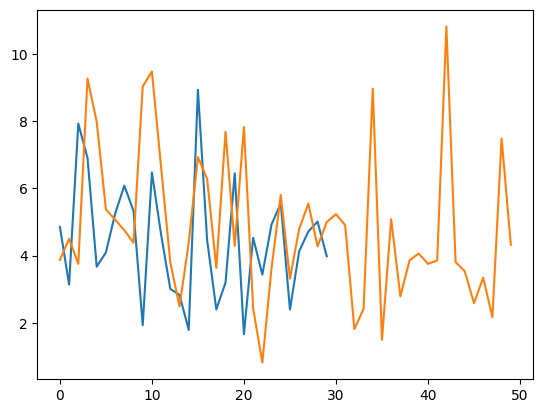

In [10]:
curve1 = -sum[0] / len(x)
curve2 = -sum[1] / len(x)
random_curve = -random_sum / len(x_)




import matplotlib.pyplot as plt
plt.plot(np.arange(len(curve1)), curve1)
# plt.plot(np.arange(len(curve2)), curve2)
plt.plot(np.arange(len(random_curve)), random_curve)

plt.show()

In [1]:
from utility import dse, parse_pickle
import pickle
import argparse

kt = dse.KT_evaluator()
print(kt)

(DEBUG) 2023-04-14 12:49:01,833 [logger.py:40] logger init.
(INFO) 2023-04-14 12:49:01,834 [logger.py:42] Logfile /home/chenyiqi/wafer_scale_chip_dse_framework/log/DSE4WSE_2023-04-14-12-49-01-833000.log
100%|██████████| 100/100 [00:00<00:00, 400.18it/s]
(INFO) 2023-04-14 12:49:05,935 [api1.py:116] Design point: {'core_buffer_size': 64, 'core_buffer_bw': 512, 'core_mac_num': 32, 'core_noc_bw': 128, 'core_noc_vc': 4, 'core_noc_buffer_size': 4, 'reticle_bw': 1, 'core_array_h': 24, 'core_array_w': 24, 'wafer_mem_bw': 900, 'reticle_array_h': 18, 'reticle_array_w': 12}
(INFO) 2023-04-14 12:49:05,936 [api1.py:117] Model parameters: {'attention_heads': 24, 'hidden_size': 2304, 'sequence_length': 2048, 'number_of_layers': 24, 'mini_batch_size': 512, 'micro_batch_size': 292, 'data_parallel_size': 1, 'model_parallel_size': 3, 'tensor_parallel_size': 8, 'num_reticle_per_pipeline_stage': 20}
(INFO) 2023-04-14 12:49:05,941 [wse_attn.py:412] Calculating training throughput of attention module
(INFO) 

-0.515959595959596


In [2]:
print(kt)

-0.515959595959596
